In [4]:
import os

run = 7

epoch_list = range(1, 41)
loss_train = list()
loss_test = list()

for epoch in epoch_list:
    loss_train.append(float(os.popen("grep -A 8 'Epoch: " + str(epoch) + " ' ./terminal_tmux.txt | grep 'INFO:trainer:    loss' | awk -F':' '{print $4}'").read()))
    # loss_test.append(float(os.popen("grep -A 8 'Epoch: " + str(epoch) + " ' ./terminal_tmux.txt | grep 'INFO:trainer:    val_loss' | awk -F':' '{print $4}'").read()))
    
    loss_test.append(float(os.popen("grep -A 25 'Working on epoch num: " + str(epoch) + "...$' ./terminal_tmux.txt | grep 'INFO:test:{' | awk -F' ' '{print $2}'").read()[:6]))



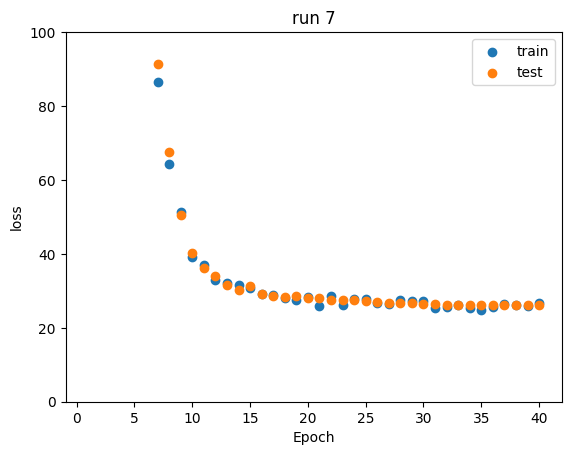

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.clf()
plt.scatter(list(epoch_list), loss_train, label='train')
plt.scatter(list(epoch_list), loss_test, label='test')
plt.ylim(0, 100)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title(f'run {run}')
plt.legend()
plt.show()